# MINI PROJECT: DID COVID-19 INFLUENCE THE 2020 US ELECTIONS?
By conducting data extraction, curation and cleaning to data from The Covid Tracking Project APIs as well as data from the 2020 US Elections, our team plotted relevant figures to visualise data correlations and used a Random Forest Classifier to predict whether a state is Democrat or Republican based on Covid-19 data.   


In [1]:
#Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sb
import plotly.express as px

In [2]:
# Passing cleaned data into dataframes 

data = pd.read_csv("all-states-history.csv")
popdf = pd.read_csv("state_population.csv")
affdf = pd.read_csv("governor_affiliation.csv")

In [3]:
#Setting headers to determine relevant columns

required_cols = ["date", "state", "deathIncrease", "hospitalizedCumulative", "hospitalizedCurrently", "totalTestResultsIncrease", "recovered", "positive"]
df = data[required_cols]

In [4]:
#Merging the three dataframes into one

df = pd.merge(df, popdf, on="state")
df = pd.merge(df, affdf, on="state")

In [5]:
# df

In [6]:
#Filtering through to rows with empty values
print(f"old length: {len(df)}")
new_df = df.dropna().copy()
print(f"new length: {len(new_df)}")

old length: 18627
new length: 7654


In [7]:
new_df

date state  deathIncrease  hospitalizedCumulative  \
111    2020-11-16    AK              0                   559.0   
112    2020-11-15    AK              0                   550.0   
113    2020-11-14    AK              2                   543.0   
114    2020-11-13    AK              0                   542.0   
115    2020-11-12    AK              0                   537.0   
...           ...   ...            ...                     ...   
18576  2020-04-20    WY              0                    51.0   
18577  2020-04-19    WY              0                    50.0   
18578  2020-04-18    WY              0                    50.0   
18579  2020-04-17    WY              0                    43.0   
18580  2020-04-16    WY              0                    43.0   

       hospitalizedCurrently  totalTestResultsIncrease  recovered  positive  \
111                    143.0                      4965     7165.0   23240.0   
112                    141.0                      5118     7164.0   22662.0   
113                    125.0                     17598     7162.0   22020.0   
114                    113.0                         0     7161.0   21286.0   
115                    113.0                     10076     7161.0   20702.0   
...                      ...                       ...        ...       ...   
18576                   19.0                       299      233.0     428.0   
18577                   19.0                        83      227.0     426.0   
18578                   19.0                        99      206.0     422.0   
18579                   19.0                       296      148.0     412.0   
18580                   19.0                       240      148.0     401.0   

           pop party  is_democrat  
111    2687341     R        False  
112    2687341     R        False  
113    2687341     R        False  
114    2687341     R        False  
115    2687341     R        False  
...        ...   ...          ...  
18576  2133993     R        False  
18577  2133993     R        False  
18578  2133993     R        False  
18579  2133993     R        False  
18580  2133993     R        False  

[7654 rows x 11 columns]

In [8]:
#Arithmetic manipulation of column values

new_df['spread1'] = new_df['hospitalizedCurrently'] / new_df['pop']
new_df['spread2'] = new_df['deathIncrease'] / new_df['pop']
new_df['healthcare1'] = (new_df['hospitalizedCumulative'] - new_df['hospitalizedCurrently']) / new_df['hospitalizedCumulative']
new_df['healthcare2'] = new_df['recovered'] / new_df['positive']
new_df['testing'] = new_df['totalTestResultsIncrease']
new_df

date state  deathIncrease  hospitalizedCumulative  \
111    2020-11-16    AK              0                   559.0   
112    2020-11-15    AK              0                   550.0   
113    2020-11-14    AK              2                   543.0   
114    2020-11-13    AK              0                   542.0   
115    2020-11-12    AK              0                   537.0   
...           ...   ...            ...                     ...   
18576  2020-04-20    WY              0                    51.0   
18577  2020-04-19    WY              0                    50.0   
18578  2020-04-18    WY              0                    50.0   
18579  2020-04-17    WY              0                    43.0   
18580  2020-04-16    WY              0                    43.0   

       hospitalizedCurrently  totalTestResultsIncrease  recovered  positive  \
111                    143.0                      4965     7165.0   23240.0   
112                    141.0                      5118     7164.0   22662.0   
113                    125.0                     17598     7162.0   22020.0   
114                    113.0                         0     7161.0   21286.0   
115                    113.0                     10076     7161.0   20702.0   
...                      ...                       ...        ...       ...   
18576                   19.0                       299      233.0     428.0   
18577                   19.0                        83      227.0     426.0   
18578                   19.0                        99      206.0     422.0   
18579                   19.0                       296      148.0     412.0   
18580                   19.0                       240      148.0     401.0   

           pop party  is_democrat   spread1       spread2  healthcare1  \
111    2687341     R        False  0.000053  0.000000e+00     0.744186   
112    2687341     R        False  0.000052  0.000000e+00     0.743636   
113    2687341     R        False  0.000047  7.442301e-07     0.769797   
114    2687341     R        False  0.000042  0.000000e+00     0.791513   
115    2687341     R        False  0.000042  0.000000e+00     0.789572   
...        ...   ...          ...       ...           ...          ...   
18576  2133993     R        False  0.000009  0.000000e+00     0.627451   
18577  2133993     R        False  0.000009  0.000000e+00     0.620000   
18578  2133993     R        False  0.000009  0.000000e+00     0.620000   
18579  2133993     R        False  0.000009  0.000000e+00     0.558140   
18580  2133993     R        False  0.000009  0.000000e+00     0.558140   

       healthcare2  testing  
111       0.308305     4965  
112       0.316124     5118  
113       0.325250    17598  
114       0.336418        0  
115       0.345909    10076  
...            ...      ...  
18576     0.544393      299  
18577     0.532864       83  
18578     0.488152       99  
18579     0.359223      296  
18580     0.369077      240  

[7654 rows x 16 columns]

In [9]:
new_df

date state  deathIncrease  hospitalizedCumulative  \
111    2020-11-16    AK              0                   559.0   
112    2020-11-15    AK              0                   550.0   
113    2020-11-14    AK              2                   543.0   
114    2020-11-13    AK              0                   542.0   
115    2020-11-12    AK              0                   537.0   
...           ...   ...            ...                     ...   
18576  2020-04-20    WY              0                    51.0   
18577  2020-04-19    WY              0                    50.0   
18578  2020-04-18    WY              0                    50.0   
18579  2020-04-17    WY              0                    43.0   
18580  2020-04-16    WY              0                    43.0   

       hospitalizedCurrently  totalTestResultsIncrease  recovered  positive  \
111                    143.0                      4965     7165.0   23240.0   
112                    141.0                      5118     7164.0   22662.0   
113                    125.0                     17598     7162.0   22020.0   
114                    113.0                         0     7161.0   21286.0   
115                    113.0                     10076     7161.0   20702.0   
...                      ...                       ...        ...       ...   
18576                   19.0                       299      233.0     428.0   
18577                   19.0                        83      227.0     426.0   
18578                   19.0                        99      206.0     422.0   
18579                   19.0                       296      148.0     412.0   
18580                   19.0                       240      148.0     401.0   

           pop party  is_democrat   spread1       spread2  healthcare1  \
111    2687341     R        False  0.000053  0.000000e+00     0.744186   
112    2687341     R        False  0.000052  0.000000e+00     0.743636   
113    2687341     R        False  0.000047  7.442301e-07     0.769797   
114    2687341     R        False  0.000042  0.000000e+00     0.791513   
115    2687341     R        False  0.000042  0.000000e+00     0.789572   
...        ...   ...          ...       ...           ...          ...   
18576  2133993     R        False  0.000009  0.000000e+00     0.627451   
18577  2133993     R        False  0.000009  0.000000e+00     0.620000   
18578  2133993     R        False  0.000009  0.000000e+00     0.620000   
18579  2133993     R        False  0.000009  0.000000e+00     0.558140   
18580  2133993     R        False  0.000009  0.000000e+00     0.558140   

       healthcare2  testing  
111       0.308305     4965  
112       0.316124     5118  
113       0.325250    17598  
114       0.336418        0  
115       0.345909    10076  
...            ...      ...  
18576     0.544393      299  
18577     0.532864       83  
18578     0.488152       99  
18579     0.359223      296  
18580     0.369077      240  

[7654 rows x 16 columns]

In [10]:
# Change all negative test column to 0
new_df['testing'] = new_df['testing'].apply(lambda x : x if x > 0 else 0)

In [11]:
new_df

date state  deathIncrease  hospitalizedCumulative  \
111    2020-11-16    AK              0                   559.0   
112    2020-11-15    AK              0                   550.0   
113    2020-11-14    AK              2                   543.0   
114    2020-11-13    AK              0                   542.0   
115    2020-11-12    AK              0                   537.0   
...           ...   ...            ...                     ...   
18576  2020-04-20    WY              0                    51.0   
18577  2020-04-19    WY              0                    50.0   
18578  2020-04-18    WY              0                    50.0   
18579  2020-04-17    WY              0                    43.0   
18580  2020-04-16    WY              0                    43.0   

       hospitalizedCurrently  totalTestResultsIncrease  recovered  positive  \
111                    143.0                      4965     7165.0   23240.0   
112                    141.0                      5118     7164.0   22662.0   
113                    125.0                     17598     7162.0   22020.0   
114                    113.0                         0     7161.0   21286.0   
115                    113.0                     10076     7161.0   20702.0   
...                      ...                       ...        ...       ...   
18576                   19.0                       299      233.0     428.0   
18577                   19.0                        83      227.0     426.0   
18578                   19.0                        99      206.0     422.0   
18579                   19.0                       296      148.0     412.0   
18580                   19.0                       240      148.0     401.0   

           pop party  is_democrat   spread1       spread2  healthcare1  \
111    2687341     R        False  0.000053  0.000000e+00     0.744186   
112    2687341     R        False  0.000052  0.000000e+00     0.743636   
113    2687341     R        False  0.000047  7.442301e-07     0.769797   
114    2687341     R        False  0.000042  0.000000e+00     0.791513   
115    2687341     R        False  0.000042  0.000000e+00     0.789572   
...        ...   ...          ...       ...           ...          ...   
18576  2133993     R        False  0.000009  0.000000e+00     0.627451   
18577  2133993     R        False  0.000009  0.000000e+00     0.620000   
18578  2133993     R        False  0.000009  0.000000e+00     0.620000   
18579  2133993     R        False  0.000009  0.000000e+00     0.558140   
18580  2133993     R        False  0.000009  0.000000e+00     0.558140   

       healthcare2  testing  
111       0.308305     4965  
112       0.316124     5118  
113       0.325250    17598  
114       0.336418        0  
115       0.345909    10076  
...            ...      ...  
18576     0.544393      299  
18577     0.532864       83  
18578     0.488152       99  
18579     0.359223      296  
18580     0.369077      240  

[7654 rows x 16 columns]

# Data Visualisation 

### Firstly, we look at the distribution of Governor Affliation

In [12]:
# df = px.data.tips()
# Here we use a column with categorical data
fig = px.histogram(new_df, x="is_democrat", color="is_democrat", color_discrete_sequence=['#DE0100', '#0015BC'])
fig.show()

In [13]:
#Distribution of Governor Party Affiliation (One per state)



unique_df = new_df.drop_duplicates(subset = 'state')
print(unique_df["is_democrat"].value_counts())

# Here we use a column with categorical data
fig = px.histogram(unique_df, x="is_democrat", color="is_democrat", color_discrete_sequence=['#DE0100', '#0015BC'])
fig.show()

# sb.catplot(y = "is_democrat", data = unique_df, kind = "count")

False    21
True      8
Name: is_democrat, dtype: int64


In [14]:
# Extract the indicators of spread/healthcare/testing
numeric_data = pd.DataFrame(new_df[["spread1", "spread2", "healthcare1", "healthcare2", "testing"]])

# Summary Statistics for all variables rounded to 6 dp
numeric_data.describe().round(6)

spread1      spread2  healthcare1  healthcare2        testing
count  7654.000000  7654.000000  7654.000000  7654.000000    7654.000000
mean      0.000038     0.000001     0.862504     0.633624   12316.390253
std       0.000033     0.000002     0.135360     0.258264   16667.887859
min       0.000000    -0.000016    -1.494297     0.024671       0.000000
25%       0.000012     0.000000     0.820826     0.444096    2481.500000
50%       0.000026     0.000000     0.897128     0.714529    6560.500000
75%       0.000055     0.000001     0.945702     0.847552   14597.500000
max       0.000174     0.000040     0.996187     0.979810  168192.000000

In [15]:
# Correlation Matrix
print(numeric_data.corr())

# # Heatmap of the Correlation Matrix
# f = plt.figure(figsize=(8, 8))
# sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
#            annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

fig = px.imshow(numeric_data.corr(), labels=dict(color="Correlation"), color_continuous_scale=["#ade8f4", "#023e8a"])
fig.show()

              spread1   spread2  healthcare1  healthcare2   testing
spread1      1.000000  0.530466    -0.060203    -0.069645  0.160146
spread2      0.530466  1.000000     0.040802     0.027402  0.107110
healthcare1 -0.060203  0.040802     1.000000     0.239366  0.183925
healthcare2 -0.069645  0.027402     0.239366     1.000000  0.015628
testing      0.160146  0.107110     0.183925     0.015628  1.000000


In [16]:
#Plot the boxplot of is_democrats against Spread1

fig = px.box(new_df, x="is_democrat", y="spread1", color="is_democrat", color_discrete_sequence=['#DE0100', '#0015BC'])
fig.show()

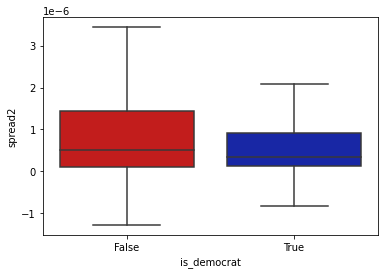

In [17]:
#Plot the boxplot of is_democrats against Spread2
colors=['#DE0100', '#0015BC']
box = sb.boxplot(x="is_democrat", y="spread2", data=new_df, showfliers=False, palette={False: "#DE0100", True: "#0015BC"})


fig = px.box(new_df, x="is_democrat", y="spread2", color="is_democrat", color_discrete_sequence=['#DE0100', '#0015BC'], points='outliers' )
fig.show()

### From the box plots, the democratic states tend to have lower medians, smaller interquartile range for both Spread1 and Spread2.

> Spread1 refers to the percentage of the population hospitalized due to Covid-19. 

> Spread2 refers to the percentage of the population that died per day due to Covid-19.



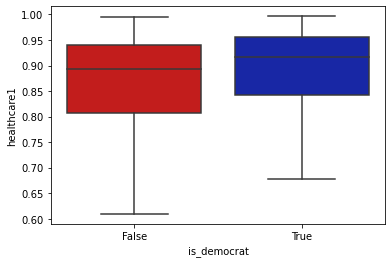

In [18]:
#Plot the boxplot of is_democrats against Healthcare1
sb.boxplot(x="is_democrat", y="healthcare1", data=new_df, showfliers=False, palette={False: "#DE0100", True: "#0015BC"})

fig = px.box(new_df, x="is_democrat", y="healthcare1", color="is_democrat", color_discrete_sequence=['#DE0100', '#0015BC'], points='outliers' )
fig.show()

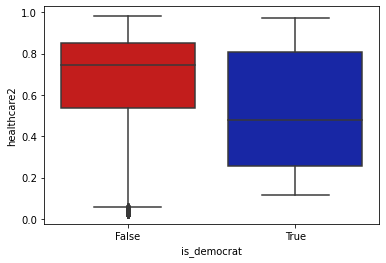

In [19]:
#Plot the boxplot of is_democrats against Healthcare2
sb.boxplot(x="is_democrat", y="healthcare2", data=new_df,  palette={False: "#DE0100", True: "#0015BC"})
fig = px.box(new_df, x="is_democrat", y="healthcare2", color="is_democrat", color_discrete_sequence=['#DE0100', '#0015BC'], points='outliers' )
fig.show()

### From the boxplot for healthcare1, we observe that Democratic states have a higher median than Republican states. As for the boxplot for healthcare2, we instead see a lower median for the Democratic states as compared to the Republican States. Hence, it is unclear from this visualisation if the political leanings of a state affects the degree of healthcare efforts. 

> Healthcare1 refers to the percentage increase in people hospitalised due to Covid-19.

> Healthcare2 refers to the percentage of recovered patients relative to all patients who tested positive for Covid-19.


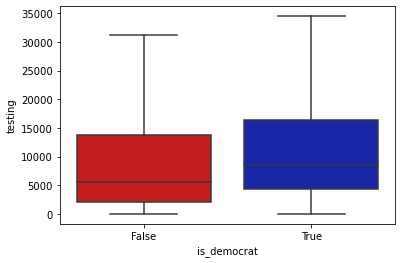

In [20]:
#Plot the boxplot of is_democrats against Testing
sb.boxplot(x="is_democrat", y="testing", data=new_df, showfliers=False, palette={False: "#DE0100", True: "#0015BC"})
fig = px.box(new_df, x="is_democrat", y="testing", color="is_democrat", color_discrete_sequence=['#DE0100', '#0015BC'], points='outliers' )
fig.show()

### It seems that the number of tests done for the Democratic states are slightly higher than that of the Republican states.

### 

### Machine Learning


#### Using a Random Forest Classifier
> When building a decision tree, at each node use some randomness in selecting the attribute to split on, say by randomly selecting an attribute or by selecting an attribute from a random subset

In [21]:
#split variables into x and y 

x = new_df[['spread1', 'spread2', 'healthcare1', 'healthcare2', 'testing']]
y = new_df[['is_democrat']]

In [22]:
#split dataset into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

Train Set : (6123, 5) (6123, 1)
Test Set  : (1531, 5) (1531, 1)


In [23]:
#import random forest classifier

from sklearn.ensemble import RandomForestClassifier
rfclass = RandomForestClassifier(random_state = 0, n_estimators = 50, max_depth = 10)
rfclass = rfclass.fit(x_train, np.ravel(y_train,order='C'))

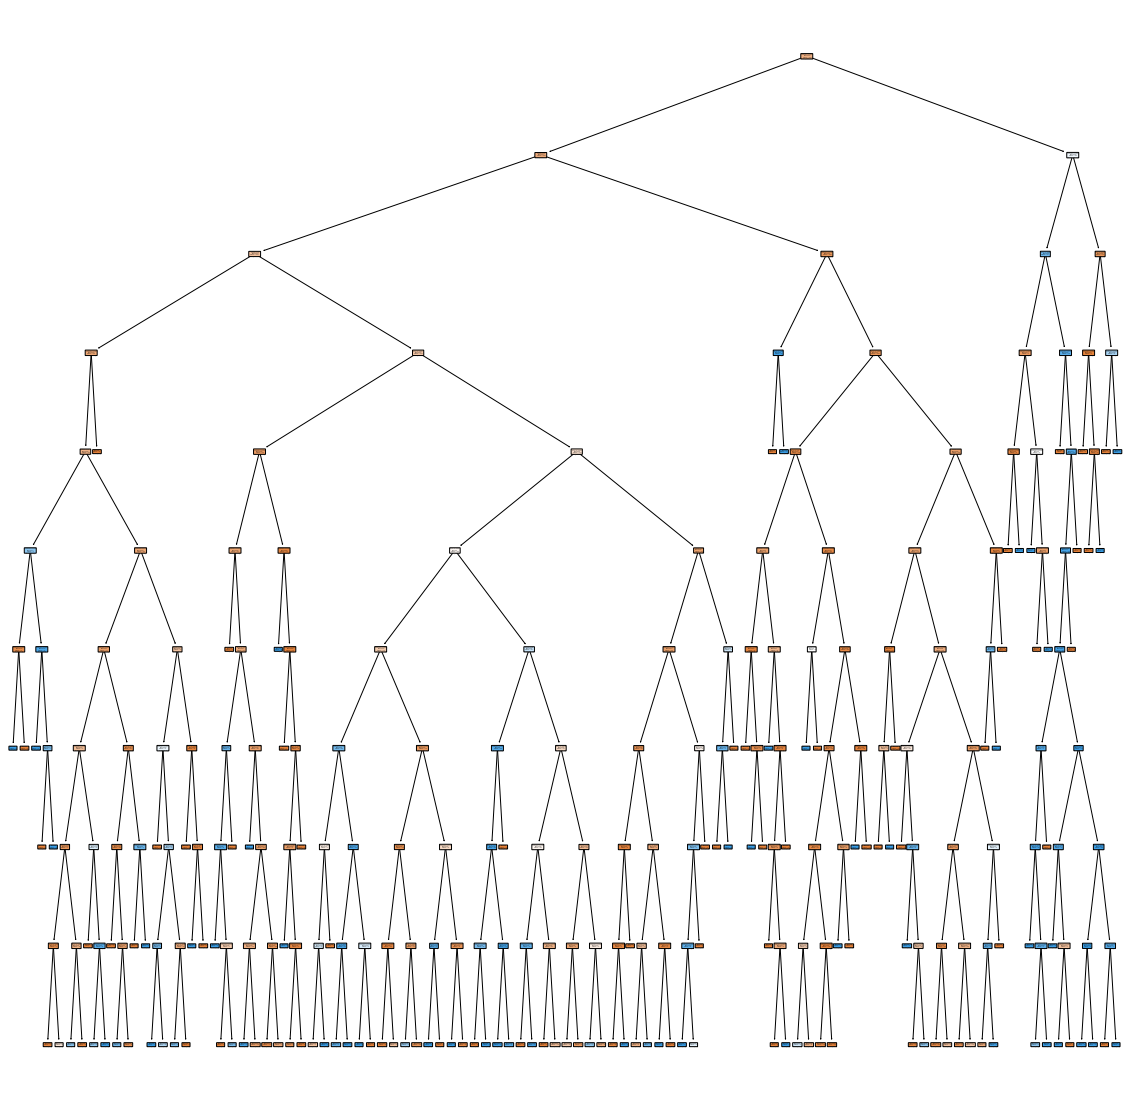

In [24]:
# visualise a single tree from the random forest

from sklearn import tree

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,20))
treeplot = tree.plot_tree(rfclass.estimators_[0], feature_names=x.columns, rounded = True, filled = True)

##### As can be seen, due to the max_depth of the tree being set as 10, the visualisation of the tree does not show much as it is much too small. Hence, to get an idea of what is in a tree in the random forest, we decrease the max_depth to 3 just for visualisation purposes.

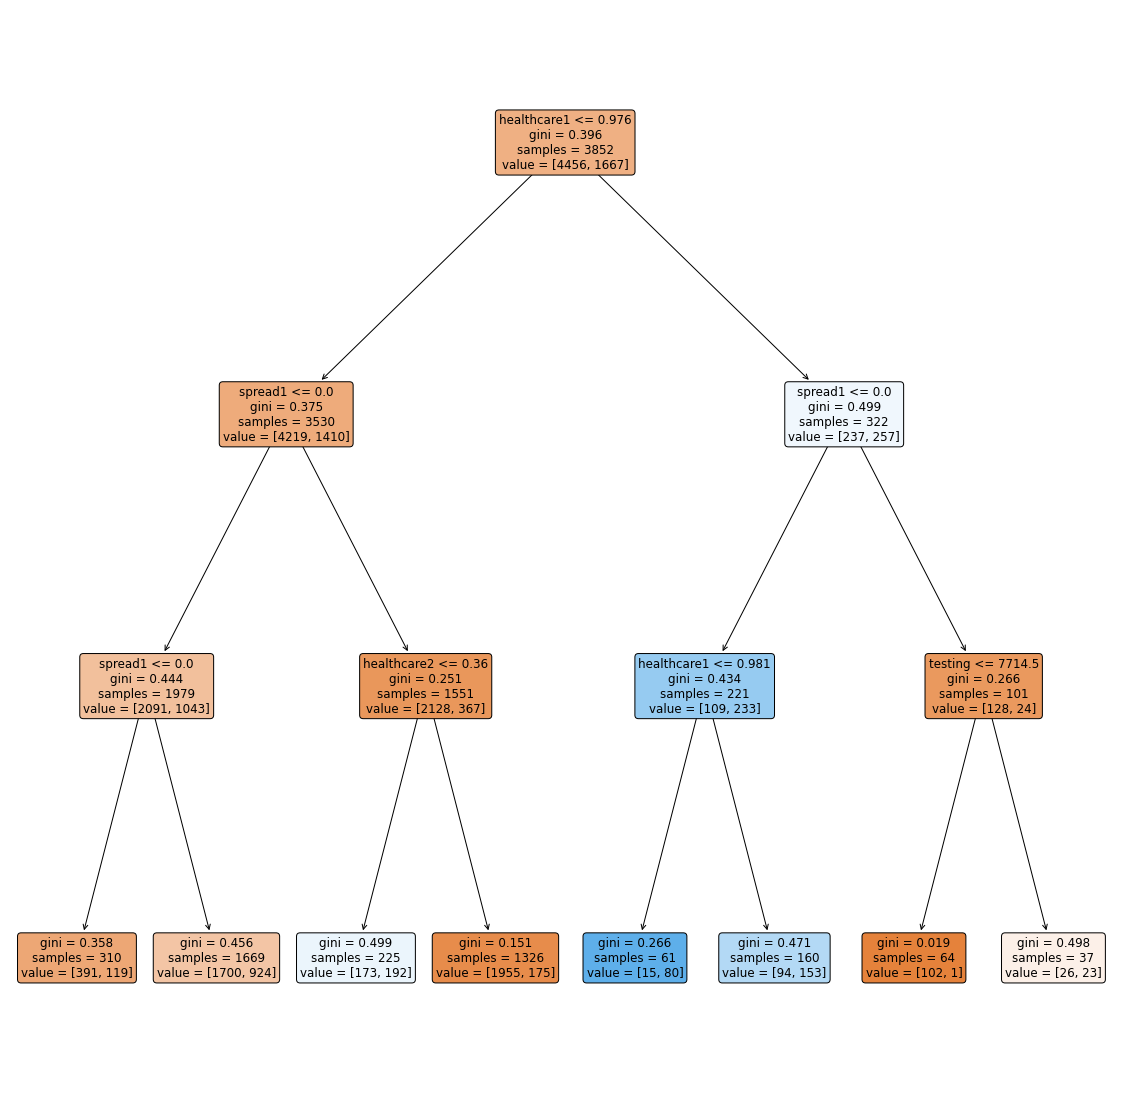

In [25]:
rfclassvis = RandomForestClassifier(random_state = 0, n_estimators = 50, max_depth = 3)
rfclassvis = rfclassvis.fit(x_train, np.ravel(y_train,order='C'))
plt.figure(figsize=(20,20))
treeplot = tree.plot_tree(rfclassvis.estimators_[0], feature_names=x.columns, rounded = True, filled = True)

### Prediction on Train Data and Goodness of Fit
#### Check how good the predictions are on the Train Set
> Metrics : Classification Accuracy and Confusion Matrix

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix:

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data

Train Accuracy : 0.9572105177200718

TPR Train : 0.8547912992357437
TNR Train : 0.9966078697421981

FPR Train : 0.0033921302578018998
FNR Train : 0.14520870076425632


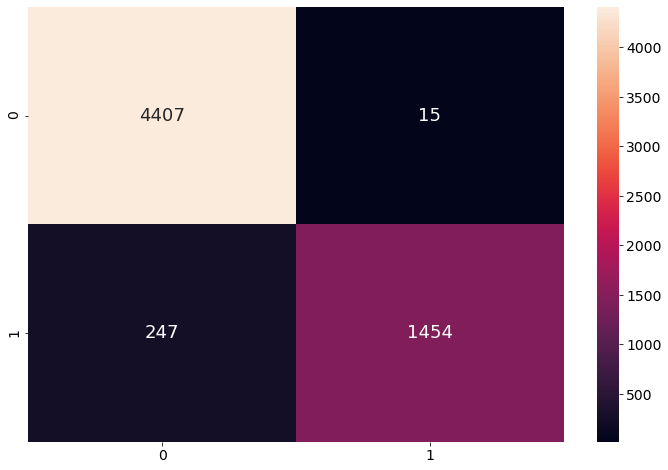

In [26]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix, classification_report

# Predict the Response corresponding to Predictors
y_train_pred = rfclass.predict(x_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Train Data\n")
print("Train Accuracy :", rfclass.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :", (fnTrain/(tpTrain + fnTrain)))

### Prediction on Test Data and Goodness of Fit
#### Check how good the predictions are on the Test Set
> Metrics : Classification Accuracy and Confusion Matrix

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix:  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Test Data

Test Accuracy : 0.930111038536904

TPR Test : 0.7772151898734178
TNR Test : 0.983274647887324

FPR Test : 0.016725352112676055
FNR Test : 0.22278481012658227


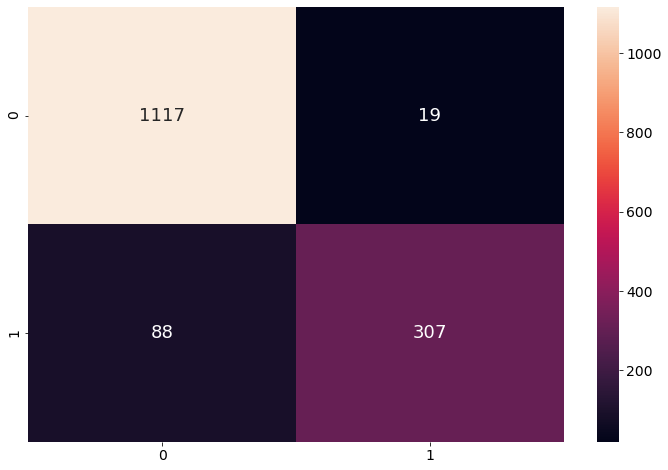

In [27]:
# Predict the Response corresponding to Predictors
y_test_pred = rfclass.predict(x_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Test Data\n")
print("Test Accuracy :", rfclass.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :", (tpTest/(tpTest + fnTest)))
print("TNR Test :", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :", (fpTest/(fpTest + tnTest)))
print("FNR Test :", (fnTest/(fnTest + tpTest)))

### Conclusions

In [28]:
# x = new_df[['spread1', 'spread2', 'healthcare1', 'healthcare2', 'testing']]
array = rfclass.feature_importances_
print("Feature Importance:\n")
print("Spread1: ", array[0])
print("Spread2: ", array[1])
print("Healthcare1: ", array[2])
print("Healthcare2: ", array[3])
print("Testing: ", array[4])

Feature Importance:

Spread1:  0.19448335442234888
Spread2:  0.02596114586928442
Healthcare1:  0.17733041992305323
Healthcare2:  0.4077447691395885
Testing:  0.194480310645725


##### Healthcare2, which is the fraction of patients tested positive who have since recovered, appears to be the strongest predictor for the random forest classifier to decide whether a state is Democratic or Republican.

### Save model to local file

In [29]:
import joblib
import time
t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H_%M', t)
joblib.dump(rfclass, f"rf_model_{timestamp}.joblib")

['rf_model_Apr-22-2021_18_14.joblib']

### How you can use our model!

In [ ]:
new_df['spread1'] = new_df['hospitalizedCurrently'] / new_df['pop']
new_df['spread2'] = new_df['deathIncrease'] / new_df['pop']
new_df['healthcare1'] = (new_df['hospitalizedCumulative'] - new_df['hospitalizedCurrently']) / new_df['hospitalizedCumulative']
new_df['healthcare2'] = new_df['recovered'] / new_df['positive']
new_df['testing'] = new_df['totalTestResultsIncrease']

In [30]:
metrics = ["Hospitalized Currently", "State Population", "Deaths Today", "Total Hospitalised Covid 19 Cases", "Recovered Cases", "Positive Cases", "Testings Done Today"]

In [43]:
values = []
for metric in metrics:
    print(f"Please enter '{metric}': ")
    values.append(int(input()))

Please enter 'Hospitalized Currently': 
12345678
Please enter 'State Population': 
1234567891011
Please enter 'Deaths Today': 
123456
Please enter 'Total Hospitalised Covid 19 Cases': 
12345
Please enter 'Recovered Cases': 
12345
Please enter 'Positive Cases': 
123456789
Please enter 'Testings Done Today': 
12345


In [44]:
spread1 = values[0] / values[1]
spread2 = values[2] / values[1]
healthcare1 = (values[3] - values[0]) / values[3] 
healthcare2 = values[4] / values[5]
testing = values[6]

X = [[spread1, spread2, healthcare1, healthcare2, testing]]

results = rfclass.predict_proba(X)

print("The model predicts that...")
print(f"The probability that the state is Democratic is: {results[0][1]}")
print(f"The probability that the state is Republic is: {results[0][0]}")


The model predicts that...
The probability that the state is Democratic is: 0.13973154362416107
The probability that the state is Republic is: 0.8602684563758389
